In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100,noise=0.25,random_state=2)

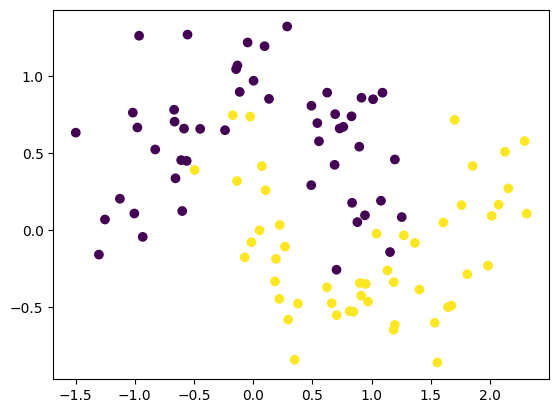

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [7]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history1 = model1.fit(X,y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


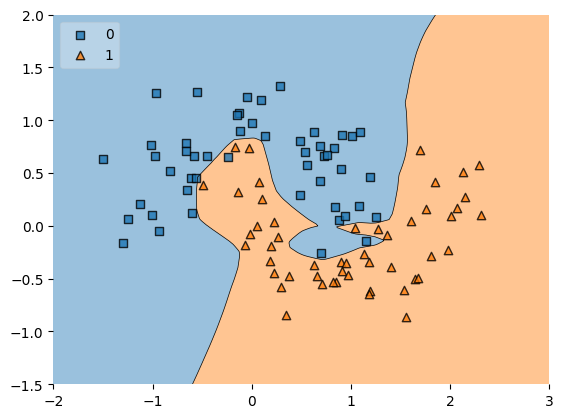

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

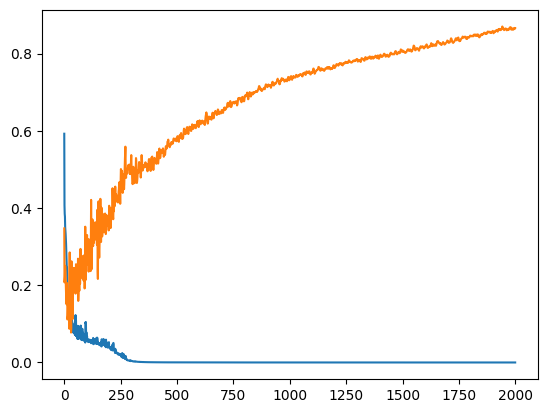

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

**Regularization**

In [12]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


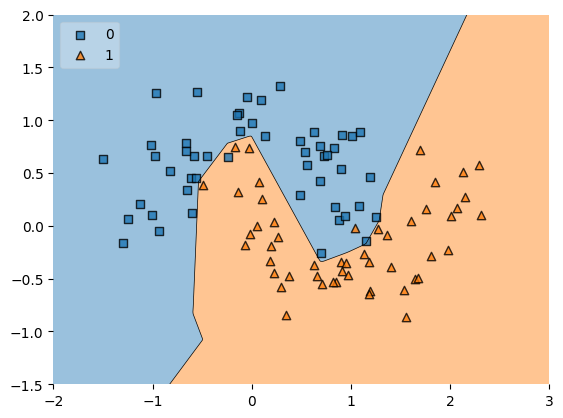

In [14]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

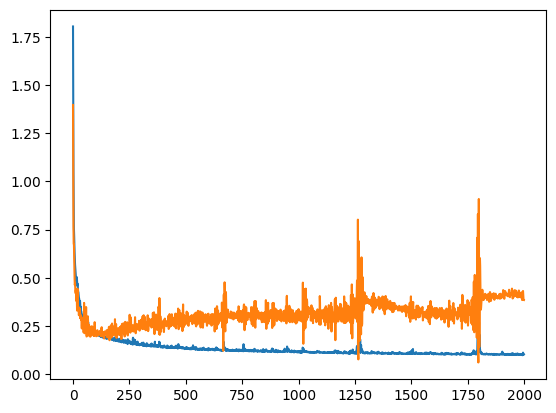

In [15]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [16]:
odel1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

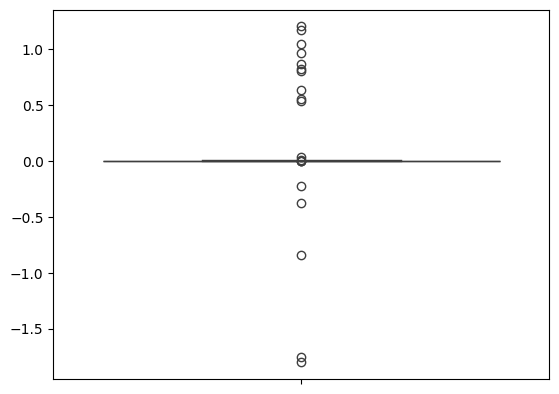

In [17]:
sns.boxplot(model2_weight_layer1)

In [19]:
model2_weight_layer1.min()

np.float32(-1.8023925)

In [21]:
model1.get_weights()[0].reshape(256)

array([-1.20106436e-01, -4.84852910e-01,  1.95211083e-01, -5.15901208e-01,
        1.99348658e-01,  3.02126378e-01,  3.86957169e-01, -2.68029004e-01,
        2.49559373e-01, -4.28058118e-01, -1.94806889e-01,  2.61442721e-01,
        2.28522971e-01, -4.83464032e-01,  2.57799089e-01, -1.40439019e-01,
        2.30841503e-01, -2.04086173e-02,  8.88453200e-02, -3.83384943e-01,
        2.30406716e-01,  2.29473934e-01, -2.98200220e-01, -3.30875337e-01,
       -4.88917768e-01,  2.83248663e-01, -2.88894847e-02, -1.79002762e-01,
       -1.48839951e-01, -4.20102894e-01,  2.42716521e-01, -1.53464586e-01,
        2.14015037e-01,  1.12300494e-03,  2.58608043e-01, -1.24128371e-01,
        2.25954622e-01,  1.36590824e-01, -3.14126998e-01,  1.22440383e-02,
       -2.53220856e-01, -1.58698216e-01, -3.85208875e-01,  1.56208396e-01,
        2.14129493e-01, -3.69657367e-01, -2.53999114e-01,  2.42932439e-01,
        2.27724597e-01,  2.58962959e-01, -5.15531711e-02,  2.25116163e-01,
        2.91676015e-01,  